In [1]:
# Load a local copy of the current ODYM branch:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from seaborn.palettes import color_palette
import xlrd
import pylab
from copy import deepcopy
import logging as log
from xlrd.biffh import BIFF_FIRST_UNICODE
import xlwt
from scipy.stats import norm
from cycler import cycler
#import seaborn as sns
import dynamic_stock_model as dsm
import product_component_model as pcm

In [2]:
# Loading data
path = os.getcwd()
data = pd.read_csv(path+"/old_model/dummy_data_battery.csv", header=0 , sep=',')
# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We store the time and inflows values in two lists
time = data['Time'].to_numpy()
stock_cars = data['Population'].to_numpy() # FIXME: Is he stock just labeled wrongly as population or is it intended this way?
years = len(time)

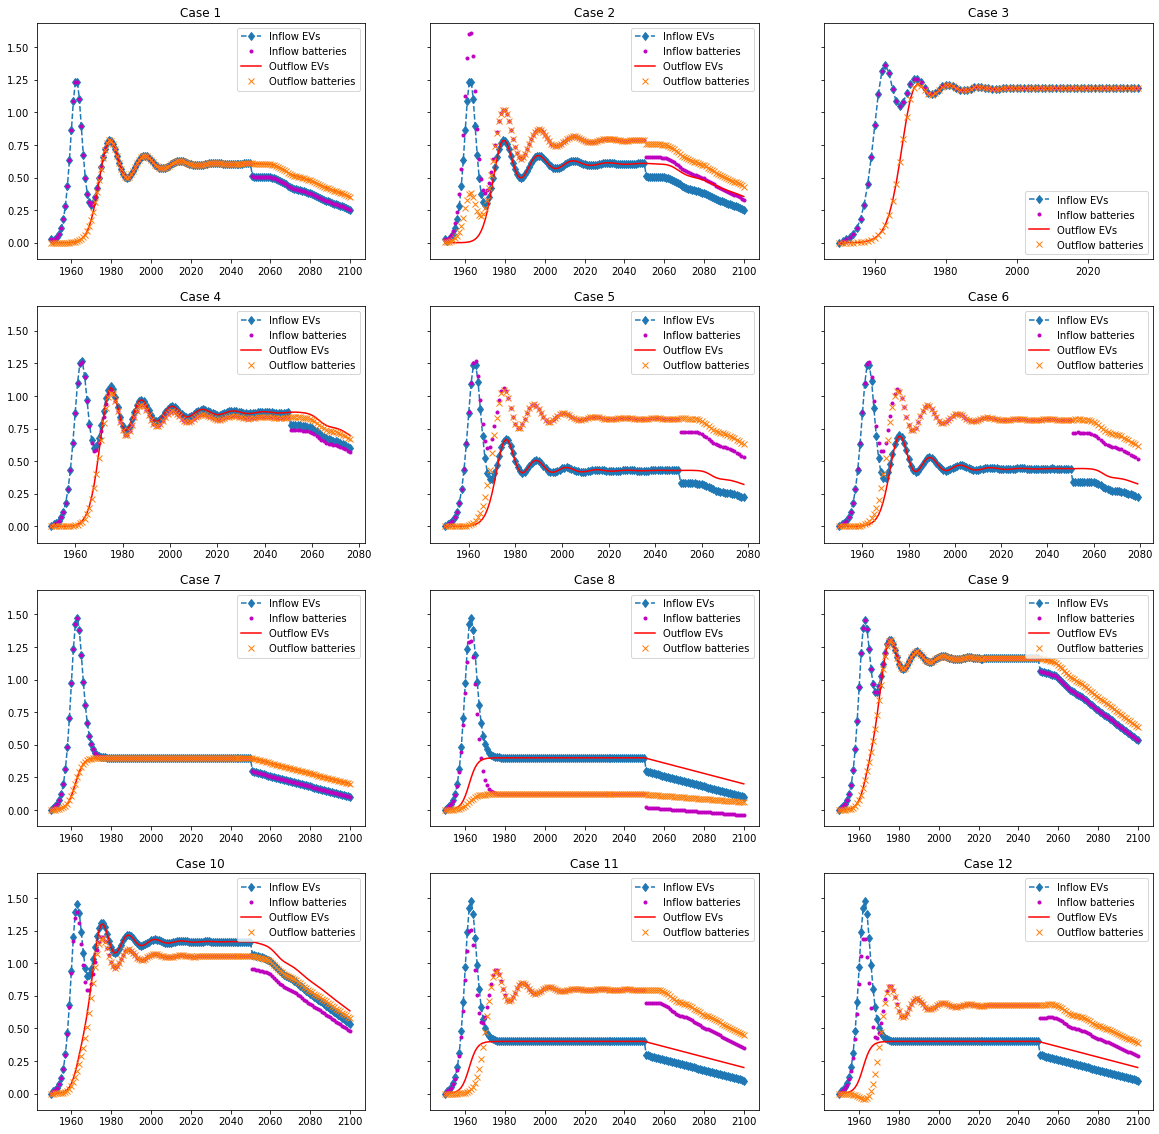

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(20,20), sharey=True)
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([8]), 'StdDev': np.array([2])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)
# Case 1
Model.case_1()
axs[0, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 0].set_title('Case 1')
axs[0, 0].legend(loc='best')

# Case 2
Model.case_2()

axs[0, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[0, 1].set_title('Case 2')
axs[0, 1].legend(loc='best')

# Case 3
Model.case_3()

axs[0, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 2].set_title('Case 3')
axs[0, 2].legend(loc='best')

# Case 4
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_4()
axs[1, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 0].set_title('Case 4')
axs[1, 0].legend(loc='best')

# Case 5
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_5()
axs[1, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 1].set_title('Case 5')
axs[1, 1].legend(loc='best')


# Case 6
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_6()

axs[1, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 2].set_title('Case 6')
axs[1, 2].legend(loc='best')


# Case 7a
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_7()

axs[2, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 0].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 0].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 0].set_title('Case 7')
axs[2, 0].legend(loc='best')


# Case 8a
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_8()

axs[2, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 1].set_title('Case 8')
axs[2, 1].legend(loc='best')

# Case 9
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_9()

axs[2, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[2, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[2, 2].set_title('Case 9')
axs[2, 2].legend(loc='best')


# Case 10
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_10()

axs[3, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[3, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 0].set_title('Case 10')
axs[3, 0].legend(loc='best')


# Case 11
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_11()

axs[3, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 1].set_title('Case 11')
axs[3, 1].legend(loc='best')


# Case 12
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_12()

axs[3, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 2].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 2].set_title('Case 12')
axs[3, 2].legend(loc='best')


In [4]:
Model.case_2()


(array([[2.47262320e-002, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [2.47248288e-002, 1.59765482e-002, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [2.47212629e-002, 1.59756415e-002, 2.62316046e-002, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        ...,
        [1.00420998e-240, 2.42551449e-237, 1.39856245e-233, ...,
         2.66872687e-001, 0.00000000e+000, 0.00000000e+000],
        [2.52378058e-244, 6.48857827e-241, 3.98240823e-237, ...,
         2.66857542e-001, 2.60687240e-001, 0.00000000e+000],
        [5.95881179e-248, 1.63070952e-244, 1.06534789e-240, ...,
         2.66819055e-001, 2.60672447e-001, 2.54327390e-001]]),
 array([0.02472702, 0.01597705, 0.02623244, 0.04295459, 0.07002573,
        0.11333565, 0.18129967, 0.28465912, 0.43410773, 0.63346862,
        0.86740648, 1.08991383, 1.23121764, 1.23546576, 1.103381  ,
        0.89231328, 0.673

In [5]:
Model.check_stock_balance_pr()

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.93889390e-18,
        1.38777878e-17, -2.77555756e-17,  0.00000000e+00,  5.55111512e-17,
       -5.55111512e-17,  1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
        2.22044605e-16,  4.44089210e-16, -4.44089210e-16,  1.11022302e-16,
        1.11022302e-16,  5.55111512e-16,  4.44089210e-16,  4.16333634e-16,
       -2.35922393e-15,  1.63757896e-15, -1.27675648e-15,  1.77635684e-15,
       -1.99840144e-15,  1.22124533e-15, -4.44089210e-16,  1.11022302e-15,
       -7.77156117e-16, -5.55111512e-16, -5.55111512e-16,  1.44328993e-15,
       -7.77156117e-16,  1.11022302e-15, -1.99840144e-15,  1.11022302e-16,
        1.11022302e-16,  3.33066907e-16,  8.32667268e-16, -8.88178420e-16,
        0.00000000e+00,  1.66533454e-15, -1.55431223e-15,  0.00000000e+00,
       -3.33066907e-16,  1.11022302e-15, -9.99200722e-16,  4.44089210e-16,
        2.22044605e-16,  3.33066907e-16, -7.77156117e-16,  5.55111512e-16,
       -9.99200722e-16, -

In [6]:
Model.check_stock_balance_cm()

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [7]:
Model.check_stock_pr_cm()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
Model.o_cm / Model.o_pr 

array([9.47331566e+03, 2.51157143e+03, 1.48490972e+03, 9.43746256e+02,
       6.36603535e+02, 4.51686545e+02, 3.34177786e+02, 2.55121517e+02,
       1.98230157e+02, 1.53937250e+02, 1.16782791e+02, 8.43830113e+01,
       5.67589104e+01, 3.50898040e+01, 2.00363622e+01, 1.08582523e+01,
       5.87611450e+00, 3.40288052e+00, 2.24669237e+00, 1.72441443e+00,
       1.49180469e+00, 1.38814970e+00, 1.34145321e+00, 1.32003307e+00,
       1.30997903e+00, 1.30513401e+00, 1.30273149e+00, 1.30150377e+00,
       1.30085663e+00, 1.30050456e+00, 1.30030680e+00, 1.30019204e+00,
       1.30012320e+00, 1.30008050e+00, 1.30005309e+00, 1.30003496e+00,
       1.30002270e+00, 1.30001439e+00, 1.30000885e+00, 1.30000529e+00,
       1.30000309e+00, 1.30000178e+00, 1.30000102e+00, 1.30000059e+00,
       1.30000034e+00, 1.30000020e+00, 1.30000031e+00, 1.30000000e+00,
       1.30000000e+00, 1.30000000e+00, 1.30000000e+00, 1.30000000e+00,
       1.30000000e+00, 1.30000000e+00, 1.30000000e+00, 1.30000000e+00,
      